# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [1]:
import sys
sys.path.append('Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



* Check Libraries below are actually needed

In [2]:
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

1. Procesing and solving the model

In [3]:
Mod = DPP.process_file3('MPTBolsillo.txt')
Mod = DLM.SolveModel(Mod, "Cal_MPTBolsillo.txt", True)

-> Stability conditions met

Steady state
          User supplied  Numerical
DY_eq               5.3        5.3
DYs_eq              2.1        2.1
Ds                  0.0        0.0
y                   0.0        0.0
ys                  0.0        0.0
...                 ...        ...
D4ps(+3)            2.0        2.0
D4ps(+2)            2.0        2.0
D4ps(+1)            2.0        2.0
Rs                  1.0        1.0
Rs_eq               1.0        1.0

[74 rows x 2 columns]

Policy function: Endogeous
                  DY       DYs    D4psae  D4psae(+3)  D4psae(+2)  D4psae(+1)  \
Int.       -0.044034  0.190623  0.055927    0.530468    0.329932    0.176684   
DY_eq(-1)   1.015121  0.000000  0.002379    0.036586    0.018996    0.006849   
DYs_eq(-1)  0.038262  1.115215  0.023922    0.255303    0.152726    0.073967   
Ds(-1)     -0.001722  0.000000  0.001903    0.011903    0.008380    0.004915   
y(-1)      -1.437345  0.000000  0.048632    0.138573    0.123148    0.093314   
...    

3. Load data

In [4]:
Describ, DBobs = HTS.ReadDB_excel('DataTarea.xlsx',sheet='VarObs')
DBobs

,Dpsae,D4psae,Dpae,Dp,D4p,Meta,Dpm,ED4p,i,imn,...,ED4s,DTI,DY,EDy,g,t,Dps,Dpms,iext,DYs
2011-03-31,0.938349,1.478646,-9.068546,-2.886654,-1.018423,2.5,-2.568317,1.973611,2.716667,2.600000,...,2.206048,14.247948,-1.949311,0.277284,0.878653,-1.881677,2.465017,-4.401295,1.905434,3.4949
2011-06-30,0.948082,1.078012,6.974091,3.129094,0.077549,2.5,-3.246502,2.043056,2.450000,2.533333,...,2.517381,8.058552,9.253783,0.277284,-0.921629,-0.007617,1.244821,11.206700,1.918172,2.3957
2011-09-30,2.376302,1.230553,-0.917911,1.146859,0.286165,2.5,10.884752,2.035694,2.658333,3.746789,...,2.653328,0.603676,2.260378,0.277284,1.496454,1.858429,0.332932,5.436430,1.809630,1.7408
2011-12-31,0.760291,1.253672,11.164924,4.504825,1.434856,2.5,5.238113,2.095833,3.833333,4.113330,...,1.949309,9.016097,4.803253,1.104530,-1.268637,0.356832,3.632756,0.276668,1.549003,0.5714
2012-03-31,2.522663,1.648670,2.416276,2.482845,2.808798,2.5,-0.487067,2.306944,3.625000,3.790000,...,2.481978,-10.633712,4.734175,1.580333,0.606145,1.284875,5.823621,21.834017,1.332079,2.1883
2012-06-30,6.210784,2.948337,-6.062904,1.486297,2.396905,2.5,6.451110,2.542708,3.625000,3.786667,...,2.585911,-6.751578,6.135399,0.046771,-0.800166,0.338398,0.307520,-0.476178,1.236440,3.4364
2012-09-30,1.702565,2.778542,-4.370240,-0.558525,1.962534,2.5,0.107849,2.176181,3.000000,3.083333,...,2.103648,21.779881,0.572962,0.378954,-1.501886,-1.014657,-0.107388,2.367107,1.129029,6.9185
2012-12-31,0.309442,2.663379,11.239309,4.183451,1.884054,2.5,2.279405,2.020694,2.583333,2.603333,...,1.416412,24.949655,-0.746755,0.152993,-0.087544,0.687598,4.966040,7.165948,1.167005,4.6230
2013-03-31,0.679702,2.198863,17.721412,6.742915,2.926734,2.5,7.989428,2.476250,2.500000,2.470000,...,0.878554,34.046105,11.963825,0.435899,-2.079971,-0.113355,4.473511,24.547744,1.121834,2.1028
2013-06-30,0.035989,0.679947,9.184436,3.428611,3.415709,2.5,10.150251,2.653333,2.500000,2.486667,...,0.988413,6.958763,5.065337,0.155378,-1.256449,0.269838,3.626987,1.077006,1.301406,3.0340


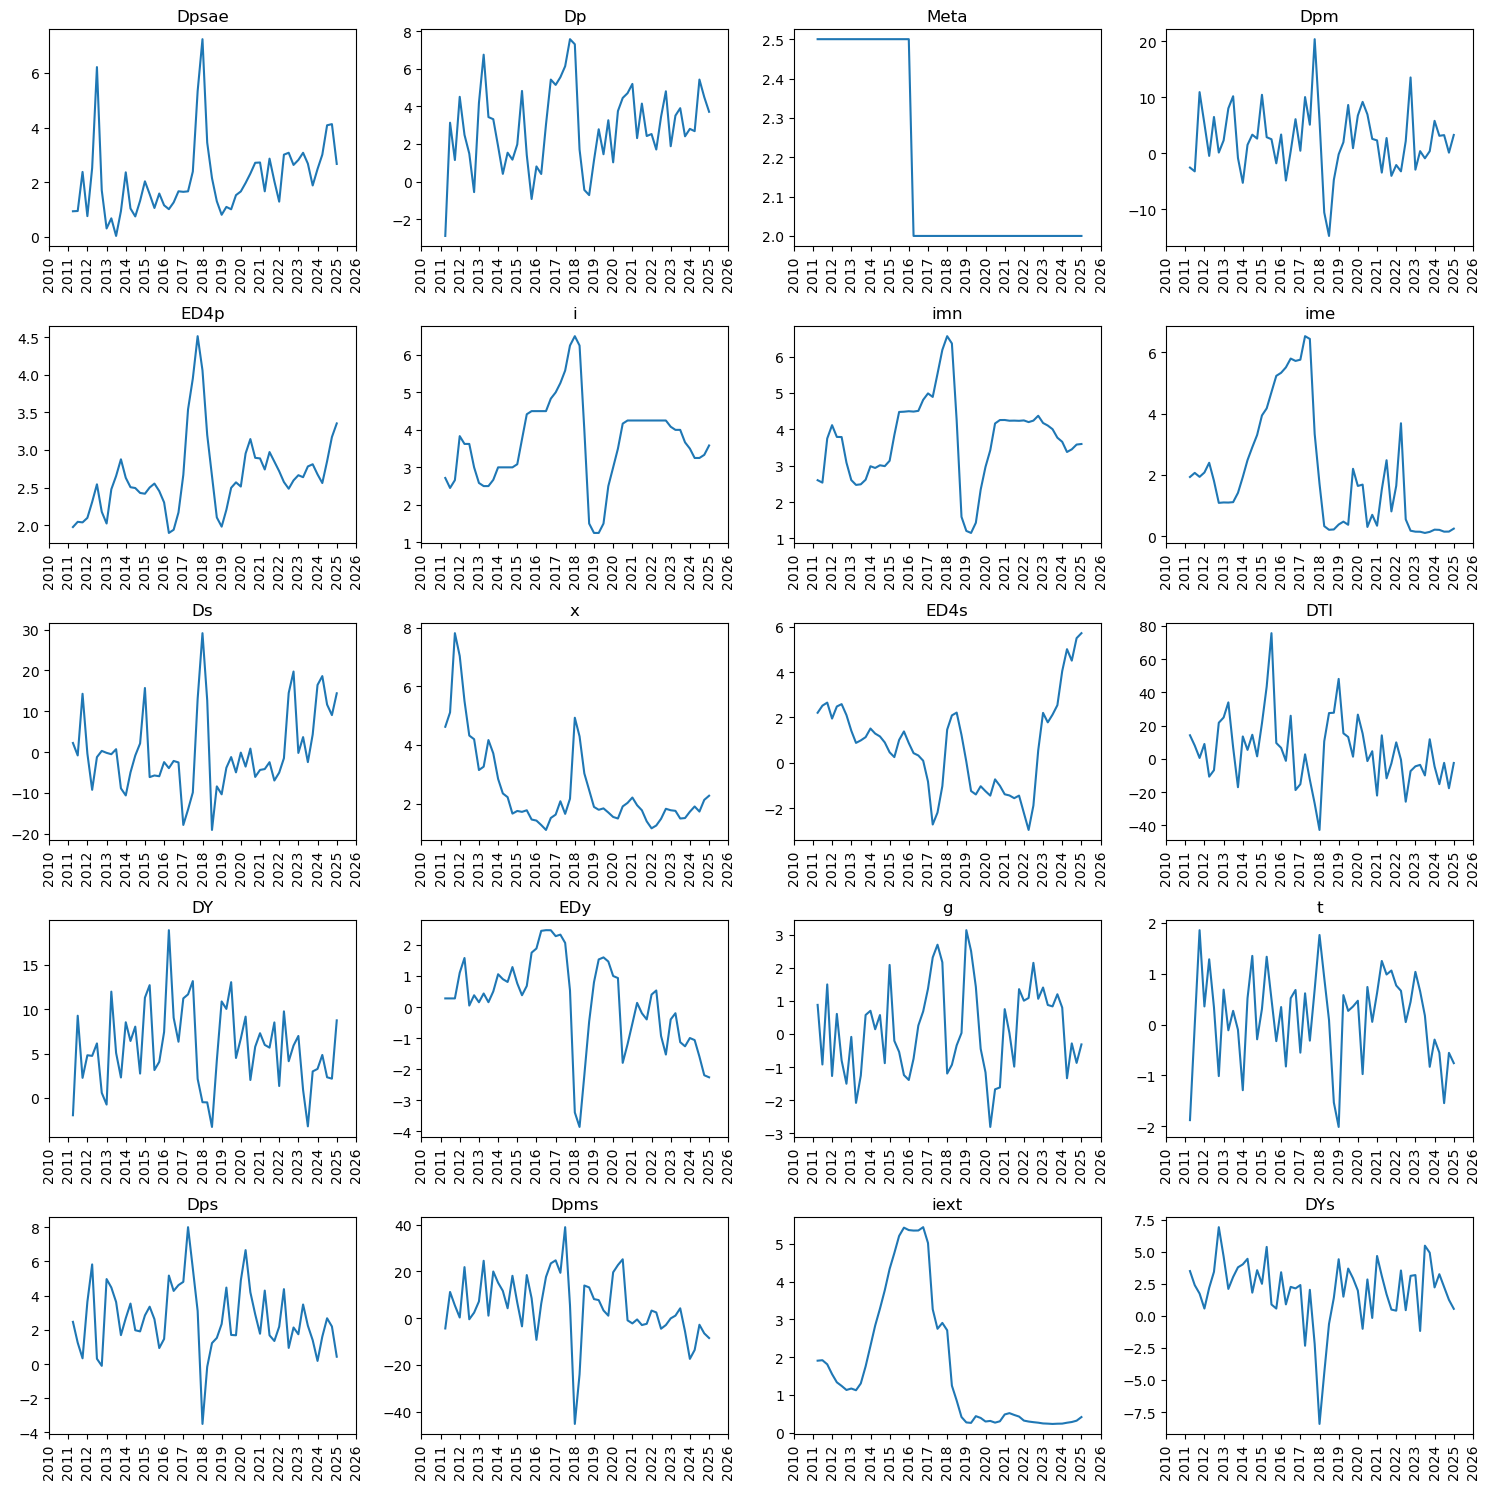

In [5]:
obsnames = DLM.sympy_to_list(Mod['StateSpaceForm']['obs_names'])
num_cols = len(obsnames)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(obsnames):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DBobs.index, DBobs[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [6]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})

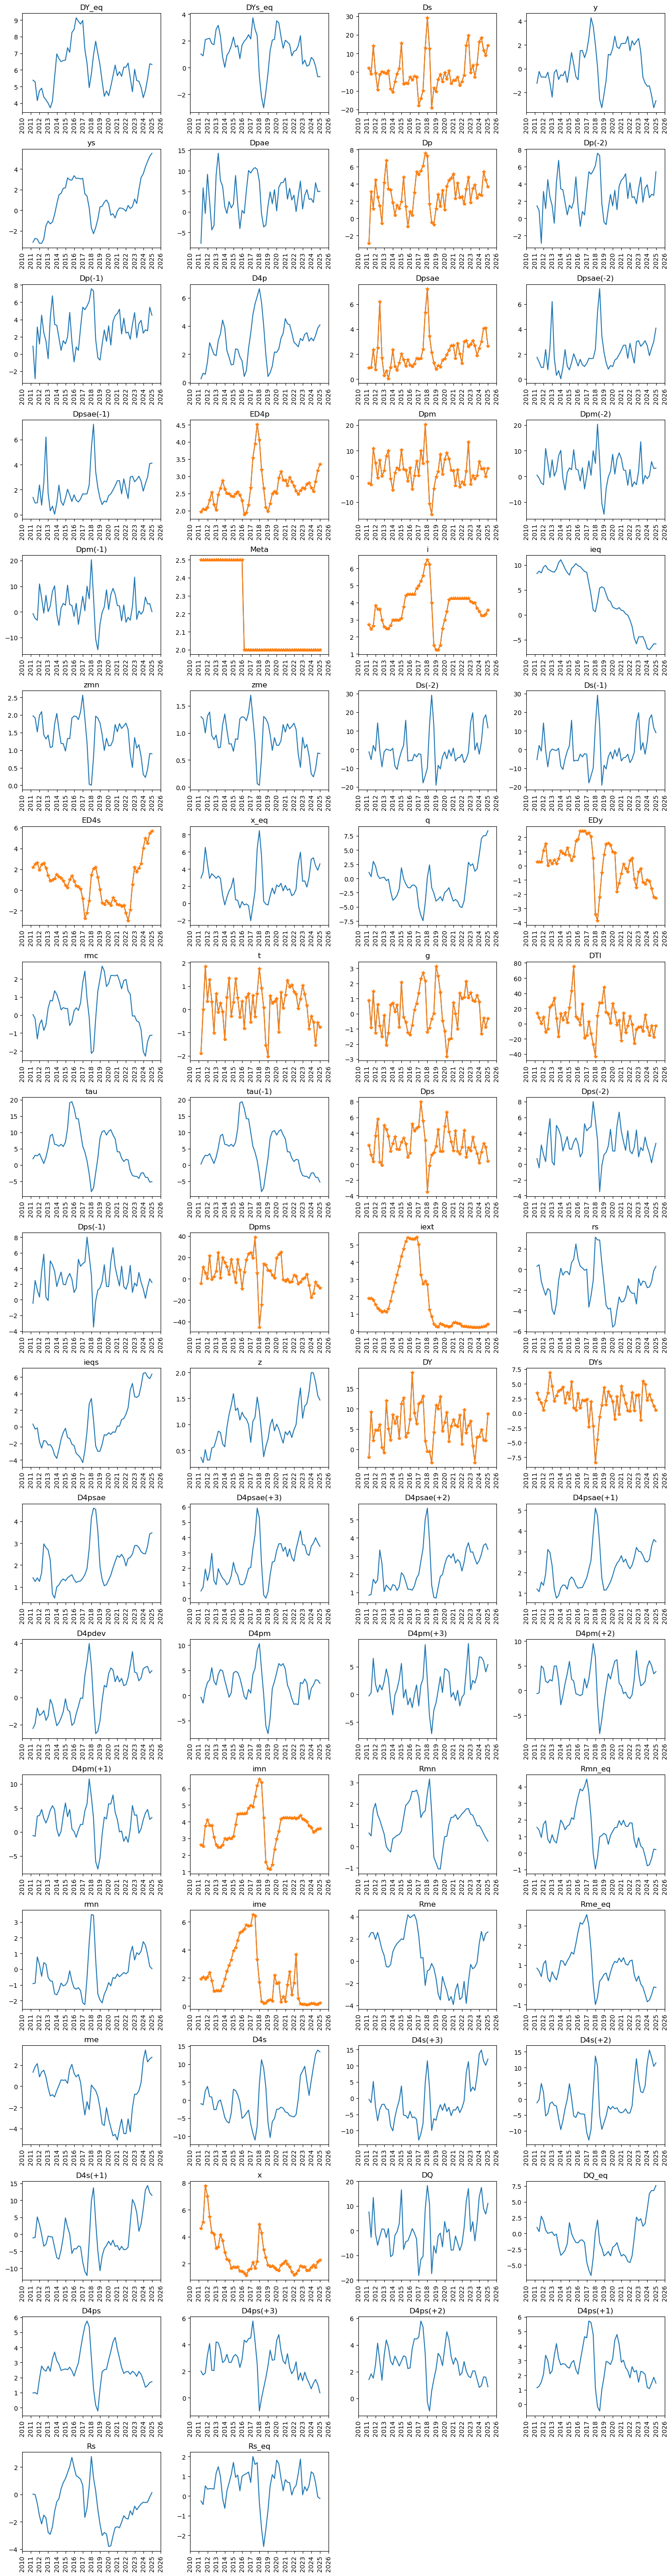

In [7]:
columns = DF_s.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DF_s.index, DF_s[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    observable = False
    for obs in obsnames:
        if col == obs:
            observable = True
    if observable:
        axs[row, col_idx].plot(DF_s.index, DBobs[col], linestyle='-',marker='*')
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [8]:
Data = DF_s
Data

,DY_eq,DYs_eq,Ds,y,ys,Dpae,Dp,Dp(-2),Dp(-1),D4p,...,D4s(+1),x,DQ,DQ_eq,D4ps,D4ps(+3),D4ps(+2),D4ps(+1),Rs,Rs_eq
2011-03-31,5.381777,1.015538,2.224523,-1.231861,-3.102140,-7.613730,-2.886654,1.458551,0.900545,0.260462,...,-1.074945,4.619287,7.576194,0.948315,0.969890,2.001569,1.413811,1.140657,0.026969,-0.260919
2011-06-30,5.283958,0.882010,-0.826220,-0.239405,-2.723718,5.824467,3.129094,0.900545,-2.886654,0.650384,...,-0.905676,5.108833,-2.710493,0.275269,0.992750,1.716676,1.830896,1.241805,-0.009197,-0.439421
2011-09-30,4.154801,2.088652,14.269530,-0.713011,-2.810681,-0.372531,1.146859,-2.886654,3.129094,0.572461,...,5.122173,7.807242,13.455603,2.713956,0.895960,1.872939,1.524290,1.521076,-0.660906,0.508173
2011-12-31,4.741207,2.148993,-0.368599,-0.697499,-3.205079,9.132456,4.504825,3.129094,1.146859,1.473531,...,2.899505,7.031673,-1.240668,1.964551,1.918882,3.220885,2.519093,2.066537,-1.567092,0.341137
2012-03-31,4.904073,2.189979,-9.237802,-0.739974,-3.205499,2.433637,2.482845,1.146859,4.504825,2.815906,...,-0.057102,5.496466,-5.897025,0.530355,2.758533,4.077025,4.133054,3.370086,-2.155852,0.368561
2012-06-30,4.368605,1.789831,-1.236525,-0.298275,-2.793856,-4.352394,1.486297,4.504825,2.482845,2.405207,...,-3.501704,4.320159,-2.415302,0.002123,2.524207,2.068549,2.791190,3.008987,-1.509038,0.365414
2012-09-30,4.204770,1.716409,0.287034,-1.206227,-1.493334,-3.352861,-0.558525,2.482845,1.486297,1.978861,...,-2.942004,4.196147,0.738171,0.133141,2.414127,2.045372,1.361435,2.093496,-1.716489,0.345165
2012-12-31,3.998636,2.873371,-0.193034,-2.392575,-1.055926,8.971091,4.183451,1.486297,-0.558525,1.898517,...,-0.535474,3.146190,0.589555,0.219226,2.747448,4.203032,3.200157,2.300831,-2.771350,1.149719
2013-03-31,3.723133,3.159829,-0.524593,-0.332402,-1.320184,14.236053,6.742915,-0.558525,4.183451,2.963535,...,-0.711301,3.260015,-2.793997,-0.339157,2.409921,4.136889,4.369804,3.341106,-2.908262,1.480921
2013-06-30,4.114940,2.338351,0.704764,-0.094803,-1.146271,7.621336,3.428611,4.183451,6.742915,3.449113,...,-0.819395,4.167135,0.903140,-0.117023,3.239788,3.642322,3.838496,4.167391,-2.360218,0.984021


# Forecast

1. Unconditional

In [9]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1')

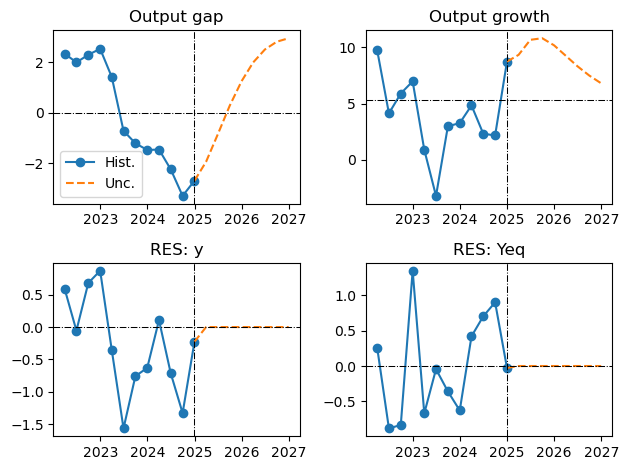

In [10]:
DBdict = {'Unc.': FDB}
lista = ['y','DY','res_y','res_DY_eq']
listanames = ['Output gap','Output growth','RES: y','RES: Yeq']
listaSS = [0,5.3,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

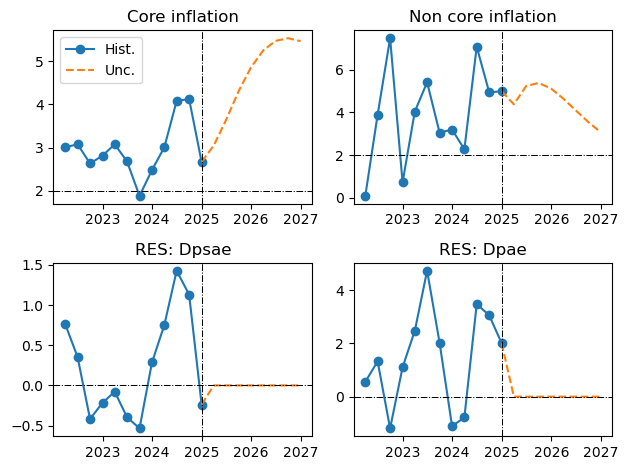

In [11]:
lista = ['Dpsae','Dpae','res_Dpsae','res_Dpae']
listanames = ['Core inflation','Non core inflation','RES: Dpsae','RES: Dpae']
listaSS = [2,2,0,0]
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

2. Not anticipated conditional forecast

In [12]:
FH = 8
UCond = HTS.ReadForeCond('SupuestosProyeccion.xlsx','2025Q1', FH)

In [13]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(UCond['UShock'])
print('Unanticipated Hardtunning')
print(UCond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(UCond['Uvar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31     -0.1     NaN
2025-06-30      NaN     NaN
2025-09-30      0.1    -1.2
2025-12-31      NaN    -0.6
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
            Dpsae     y
2025-03-31    NaN   NaN
2025-06-30    NaN   NaN
2025-09-30    NaN   NaN
2025-12-31    NaN   NaN
2026-03-31    2.1   NaN
2026-06-30    2.0  1.50
2026-09-30    NaN  0.75
2026-12-31    NaN   NaN
-> Shocks to achieve hardtunning:
['res_Dpsae', 'res_y']


In [14]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',UCond)

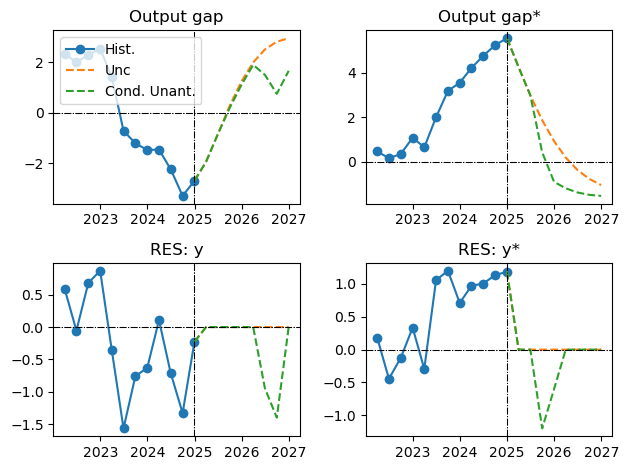

In [15]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

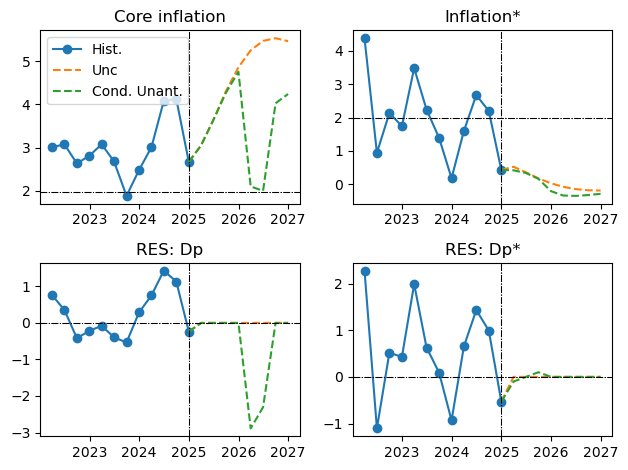

In [16]:
lista = ['Dpsae','Dps','res_Dpsae','res_Dps']
listanames = ['Core inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [17]:
UFDB['Dpsae_uh'] = UCond['Uvar']['var']['Dpsae']
UFDB[['Dpsae','Dpsae_uh']].tail(10)

,Dpsae,Dpsae_uh
2024-09-30,4.124964,NaN
2024-12-31,2.669623,NaN
2025-03-31,3.050873,NaN
2025-06-30,3.643163,NaN
2025-09-30,4.271223,NaN
2025-12-31,4.758241,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,4.026834,NaN
2026-12-31,4.243101,NaN
